### Part I Review the online programming. 

In [3]:
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
prices = defaultdict(int)

for i,k in enumerate(original_price):
    prices[i+1] = k

In [4]:
prices

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

如果想统计 r(n) 的调用次数，同时不需要修改 r(n) 的内部代码，可以使用装饰器(Decorator)

In [5]:
from functools import wraps

In [6]:
called_time_with_arg = defaultdict(int)
solution = {}

In [7]:
def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        return result
    return _wrap

In [8]:
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue
    """
    max_price, max_split = max(
        [(prices[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], 
        key = lambda x:x[0] 
    )
    
    solution[n] = (n-max_split, max_split)
    
    return max_price

In [9]:
r(9)

25

In [10]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3)}

In [11]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [12]:
parse_solution(9)

[6, 3]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

$$loss_2=\frac{1}{n}\sum{|y_i-\hat{y_i}|}$$

In [25]:
def abs_loss(y, y_hat):
    return sum(abs(y_i-y_i_hat) for y_i, y_i_hat in zip(list(y), list(y_hat))) / len(y)

$$if\quad y_i>\hat{y_i} \quad or \quad y_i<\hat{y_i}$$
$$d_k=-\frac{1}{n}\sum{(y_i-\hat{y_i})x_i}$$<br>
$$d_b=-\frac{1}{n}\sum{(y_i-\hat{y_i})}$$

$$if\quad y_i==\hat{y_i}$$
$$d_k=0$$<br>
$$d_b=0$$

In [16]:
def partial_k_(x, y, y_hat):
    k_gradient = 0
    for x_i, y_i, y_i_hat in zip(list(x), list(y),list(y_hat)):
        if abs(y_i - y_i_hat) < 1e-5: k_gradient += 0
        else:
            k_gradient += (y_i - y_i_hat) * x_i
    return (-1 / len(y)) * k_gradient

def partial_b_(y, y_hat):
    b_gradient = 0
    for y_i, y_i_hat in zip(list(y),list(y_hat)):
        if abs(y_i - y_i_hat) < 1e-5: b_gradient += 0
        else:
            b_gradient += (y_i - y_i_hat)
    return (-1 / len(y)) * b_gradient

In [21]:
def draw_x_and_y():
    plt.scatter(X[:,5], Y)

In [22]:
def price(k, rm, b):
    return rm * k + b

In [23]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random
data = load_boston()
X, Y = data['data'], data['target']

In [31]:
x = X[:,5]
y = Y[:] # data set

training_times = 2000
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
learning_rate = 1e-3

for i in range(training_times):
    price_by_gradient_descent = [price(best_k, rm, best_b) for rm in x]
    k_direction = partial_k_(x, y, price_by_gradient_descent)
    b_direction = partial_b_(y, price_by_gradient_descent)
    
    # upadate
    best_k -= k_direction * learning_rate
    best_b -= b_direction * learning_rate
    cur_loss = abs_loss(x, price_by_gradient_descent)
    print('times {} \tk:{},\tb:{},\tloss:{}'.format(i, best_k, best_b, cur_loss))
price_by_random_k_and_b = [price(best_k, rm, best_b) for rm in x]

times 0 	k:-32.167932347862404,	b:-86.20978340085284,	loss:307.9199929101249
times 1 	k:-30.193666475224127,	b:-85.8988771173245,	loss:294.6581115915863
times 2 	k:-28.30030409373185,	b:-85.60068927927264,	loss:281.93966611510075
times 3 	k:-26.484529996637164,	b:-85.31469871938928,	loss:269.74238794660386
times 4 	k:-24.743164825416414,	b:-85.04040562639607,	loss:258.0449210564568
times 5 	k:-23.07315950307712,	b:-84.77733066993183,	loss:246.82678452747268
times 6 	k:-21.471589895572446,	b:-84.5250141612999,	loss:236.06833669517457
times 7 	k:-19.935651691976513,	b:-84.28301524860565,	loss:225.7507407574811
times 8 	k:-18.46265549445632,	b:-84.05091114487527,	loss:215.8559317936206
times 9 	k:-17.050022109443333,	b:-83.828296387804,	loss:206.36658513451647
times 10 	k:-15.695278031760171,	b:-83.61478212983798,	loss:197.26608602927135
times 11 	k:-14.396051113795606,	b:-83.40999545734658,	loss:188.53850055463644
times 12 	k:-13.150066412145053,	b:-83.2135787376933,	loss:180.16854771653

times 243 	k:15.991580875409225,	b:-78.50742698000843,	loss:16.379470407054782
times 244 	k:15.991573847215129,	b:-78.50688798578203,	loss:16.379940745906218
times 245 	k:15.991563712692118,	b:-78.50634948638022,	loss:16.38039158741564
times 246 	k:15.991550599169978,	b:-78.50581146178604,	loss:16.38082373053428
times 247 	k:15.991534628760865,	b:-78.50527389280276,	loss:16.381237941474332
times 248 	k:15.99151591857311,	b:-78.50473676102028,	loss:16.381634955050828
times 249 	k:15.991494580916255,	b:-78.5042000487829,	loss:16.382015475967968
times 250 	k:15.991470723497704,	b:-78.50366373915838,	loss:16.382380180053147
times 251 	k:15.991444449611299,	b:-78.50312781590834,	loss:16.382729715440142
times 252 	k:15.99141585831818,	b:-78.50259226345977,	loss:16.383064703703912
times 253 	k:15.991385044620225,	b:-78.50205706687784,	loss:16.383385740949052
times 254 	k:15.991352099626399,	b:-78.50152221183966,	loss:16.383693398853293
times 255 	k:15.99131711071226,	b:-78.50098768460927,	los

times 475 	k:15.974234786370996,	b:-78.38502473469237,	loss:16.389813714771577
times 476 	k:15.974152163201966,	b:-78.38449912888362,	loss:16.389808287863556
times 477 	k:15.974069540837322,	b:-78.38397352942427,	loss:16.38980285983463
times 478 	k:15.973986919284801,	b:-78.38344793631303,	loss:16.389797430733378
times 479 	k:15.973904298551822,	b:-78.38292234954865,	loss:16.38979200060647
times 480 	k:15.9738216786455,	b:-78.38239676912994,	loss:16.38978656949857
times 481 	k:15.973739059572658,	b:-78.38187119505574,	loss:16.389781137452612
times 482 	k:15.973656441339838,	b:-78.38134562732495,	loss:16.389775704509695
times 483 	k:15.973573823953313,	b:-78.3808200659365,	loss:16.389770270709253
times 484 	k:15.973491207419102,	b:-78.38029451088937,	loss:16.38976483608913
times 485 	k:15.973408591742972,	b:-78.37976896218258,	loss:16.389759400685598
times 486 	k:15.973325976930457,	b:-78.37924341981518,	loss:16.38975396453345
times 487 	k:15.973243362986864,	b:-78.37871788378625,	loss:

times 708 	k:15.955009452424477,	b:-78.2627293826557,	loss:16.388544976474996
times 709 	k:15.954927055800333,	b:-78.26220524800416,	loss:16.38853953587621
times 710 	k:15.954844660166883,	b:-78.26168111965463,	loss:16.38853409534278
times 711 	k:15.954762265524115,	b:-78.261156997607,	loss:16.388528654874705
times 712 	k:15.954679871872019,	b:-78.26063288186123,	loss:16.38852321447199
times 713 	k:15.954597479210582,	b:-78.26010877241721,	loss:16.3885177741346
times 714 	k:15.954515087539793,	b:-78.25958466927489,	loss:16.388512333862575
times 715 	k:15.95443269685964,	b:-78.25906057243418,	loss:16.38850689365591
times 716 	k:15.954350307170113,	b:-78.258536481895,	loss:16.3885014535146
times 717 	k:15.9542679184712,	b:-78.2580123976573,	loss:16.38849601343864
times 718 	k:15.954185530762889,	b:-78.25748831972098,	loss:16.388490573428058
times 719 	k:15.954103144045167,	b:-78.25696424808596,	loss:16.388485133482824
times 720 	k:15.954020758318025,	b:-78.25644018275219,	loss:16.3884796

times 1004 	k:15.930663254868815,	b:-78.10786034687433,	loss:16.38693741146564
times 1005 	k:15.930581150973664,	b:-78.10733807430822,	loss:16.38693199019394
times 1006 	k:15.930499048065698,	b:-78.10681580802171,	loss:16.386926568987406
times 1007 	k:15.930416946144906,	b:-78.10629354801472,	loss:16.386921147846046
times 1008 	k:15.930334845211275,	b:-78.10577129428718,	loss:16.386915726769875
times 1009 	k:15.930252745264795,	b:-78.10524904683902,	loss:16.386910305758907
times 1010 	k:15.930170646305452,	b:-78.10472680567017,	loss:16.386904884813084
times 1011 	k:15.930088548333234,	b:-78.10420457078054,	loss:16.386899463932462
times 1012 	k:15.930006451348131,	b:-78.10368234217006,	loss:16.386894043117007
times 1013 	k:15.929924355350131,	b:-78.10316011983866,	loss:16.386888622366715
times 1014 	k:15.929842260339221,	b:-78.10263790378626,	loss:16.386883201681627
times 1015 	k:15.92976016631539,	b:-78.10211569401278,	loss:16.38687778106169
times 1016 	k:15.929678073278625,	b:-78.1015

times 1276 	k:15.908367339755287,	b:-77.96603339970326,	loss:16.38546522535478
times 1277 	k:15.908285503937593,	b:-77.9655128324095,	loss:16.38545982178405
times 1278 	k:15.908203669103862,	b:-77.96499227137484,	loss:16.385454418278275
times 1279 	k:15.90812183525408,	b:-77.9644717165992,	loss:16.38544901483749
times 1280 	k:15.908040002388239,	b:-77.96395116808252,	loss:16.385443611461653
times 1281 	k:15.907958170506323,	b:-77.9634306258247,	loss:16.38543820815082
times 1282 	k:15.907876339608322,	b:-77.96291008982568,	loss:16.385432804904916
times 1283 	k:15.907794509694224,	b:-77.96238956008538,	loss:16.385427401724
times 1284 	k:15.907712680764018,	b:-77.96186903660374,	loss:16.38542199860806
times 1285 	k:15.907630852817691,	b:-77.96134851938068,	loss:16.385416595557082
times 1286 	k:15.907549025855232,	b:-77.9608280084161,	loss:16.38541119257106
times 1287 	k:15.907467199876628,	b:-77.96030750370994,	loss:16.385405789649994
times 1288 	k:15.907385374881867,	b:-77.95978700526214

times 1506 	k:15.889570990666844,	b:-77.84646760500779,	loss:16.384224113515288
times 1507 	k:15.889489380849225,	b:-77.84594847532688,	loss:16.38421872486751
times 1508 	k:15.88940777201285,	b:-77.84542935188779,	loss:16.384213336284468
times 1509 	k:15.889326164157707,	b:-77.84491023469043,	loss:16.38420794776624
times 1510 	k:15.889244557283783,	b:-77.84439112373474,	loss:16.38420255931277
times 1511 	k:15.889162951391068,	b:-77.84387201902064,	loss:16.384197170924118
times 1512 	k:15.889081346479548,	b:-77.84335292054806,	loss:16.384191782600222
times 1513 	k:15.888999742549213,	b:-77.84283382831691,	loss:16.384186394341086
times 1514 	k:15.888918139600051,	b:-77.84231474232713,	loss:16.38418100614675
times 1515 	k:15.888836537632049,	b:-77.84179566257865,	loss:16.384175618017178
times 1516 	k:15.888754936645196,	b:-77.84127658907137,	loss:16.384170229952392
times 1517 	k:15.888673336639481,	b:-77.84075752180523,	loss:16.38416484195237
times 1518 	k:15.888591737614892,	b:-77.840238

times 1773 	k:15.867815977359937,	b:-77.70808139805324,	loss:16.38278764283805
times 1774 	k:15.86773462911614,	b:-77.70756393227457,	loss:16.382782271461547
times 1775 	k:15.86765328185044,	b:-77.70704647271769,	loss:16.382776900149608
times 1776 	k:15.86757193556283,	b:-77.70652901938256,	loss:16.382771528902275
times 1777 	k:15.867490590253297,	b:-77.70601157226908,	loss:16.38276615771952
times 1778 	k:15.867409245921827,	b:-77.70549413137718,	loss:16.382760786601338
times 1779 	k:15.86732790256841,	b:-77.7049766967068,	loss:16.382755415547738
times 1780 	k:15.867246560193035,	b:-77.70445926825785,	loss:16.382750044558712
times 1781 	k:15.867165218795689,	b:-77.70394184603026,	loss:16.382744673634292
times 1782 	k:15.867083878376361,	b:-77.70342443002396,	loss:16.382739302774397
times 1783 	k:15.867002538935038,	b:-77.70290702023887,	loss:16.38273393197911
times 1784 	k:15.86692120047171,	b:-77.7023896166749,	loss:16.382728561248413
times 1785 	k:15.866839862986364,	b:-77.7018722193

times 1976 	k:15.851322321704107,	b:-77.60316330801548,	loss:16.3816985764933
times 1977 	k:15.851241171773644,	b:-77.60264710373133,	loss:16.381693218211286
times 1978 	k:15.851160022818897,	b:-77.60213090565382,	loss:16.381687859993725
times 1979 	k:15.851078874839853,	b:-77.60161471378288,	loss:16.381682501840583
times 1980 	k:15.850997727836502,	b:-77.60109852811843,	loss:16.381677143751844
times 1981 	k:15.85091658180883,	b:-77.6005823486604,	loss:16.381671785727555
times 1982 	k:15.850835436756828,	b:-77.6000661754087,	loss:16.38166642776768
times 1983 	k:15.850754292680483,	b:-77.59955000836328,	loss:16.381661069872234
times 1984 	k:15.850673149579782,	b:-77.59903384752405,	loss:16.381655712041194
times 1985 	k:15.850592007454715,	b:-77.59851769289094,	loss:16.3816503542746
times 1986 	k:15.85051086630527,	b:-77.59800154446387,	loss:16.381644996572405
times 1987 	k:15.850429726131432,	b:-77.59748540224277,	loss:16.381639638934644
times 1988 	k:15.850348586933194,	b:-77.596969266

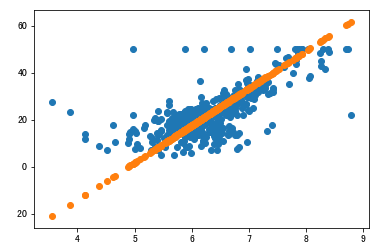

In [32]:
draw_x_and_y()
plt.scatter(x, price_by_random_k_and_b)

### Part 3: Finish the Solution Parse Part of Edit-Distance

operation: DEL、ADD、SUB

In [80]:
solution = {}

In [81]:
def lru_cache(maxsize):
    cache = {}
    def middle(func):
        def _wrap(str1, str2):
            if (str1, str2) in cache: 
                result = cache[(str1, str2)]
            else:
                result = func(str1, str2)
                cache[(str1, str2)] = result
            return result
        return _wrap
    return middle

In [82]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))
    
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation
    
    return min_distance

In [83]:
edit_distance('ABCDE', 'ABCCEF')

2

In [84]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [91]:
def parse_solution_edit_distance(str1, str2):
    operator = solution[(str1, str2)]
    if 'ADD' in operator: 
        return '{}->{}'.format(operator, parse_solution_edit_distance(str1, str2[:-1]))
    elif 'DEL' in operator:
        return '{}->{}'.format(operator, parse_solution_edit_distance(str1[:-1], str2))
    elif 'SUB' in operator:
        return '{}->{}'.format(operator, parse_solution_edit_distance(str1[:-1], str2[:-1]))
    else:
        return 'finished'

In [93]:
parse_solution_edit_distance('AB', 'ABCCE')

'ADD E->ADD C->ADD C->finished'

### Part 5-1: review machine learning

#### 1.Why do we use Derivative / Gredient to fit a target function?

ANS: 导数/梯度 的反方向是 目标函数 的下降方向.

#### 2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

ANS:Gredient指的是目标函数的变化，Descent是利用Gradient进行参数更新的方法.

#### 3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

ANS:每一步都可以获得目标函数下降的方向.

#### 4. Using the simple words to describe: What's the machine leanring.

ANS: 如何根据数据自动生成函数.

### Part 5: Answer following questions:

#### 1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?

ANS: 动态规划可以用于解决搜索问题中的冗余计算，提升效率。与其他搜索问题相比，动态规划可以得到全局最优解。

#### 2.Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

ANS:机器学习只是解决问题的一种方法。一些问题使用搜索解决更加简单，而相反使用机器学习更加复杂，同时机器学习需要大量的数据。

##### 3.Can you catch up at least 3 problems which could solved by Dynamic Programming?

ANS:<br>
1.编辑距离<br>
2.币种兑换<br>
3.最大子数组和<br>

##### 4.Can you catch up at least 3 problems wich could sloved by Edit Distance?

ANS:<br> 
1.Spell Correction<br>
2.Evaluating Machine Translation<br>
3.Evaluating Speech Recognition<br>

#### 5.Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

ANS:<br> 
1.Subproblems: 动态规划问题通常可以将问题分解为若干个子问题，通过解决子问题来获得当前问题的解<br>
2.Overlappings: 子问题间存在重合，通过将已解决的子问题存储在表中已避免重复计算<br>
3.Parse solution: 进行解析得到问题的最优解.<br>

#### 6.What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

ANS:<br>
1.动态规划只是一种思想，具体到问题要具体分析<br>
2.需要存所有的中间结果<br>

### (Optinal) Finish the k-person-salesman problem: